### Dobrodošli v programu za analizo vprašanj na strani math.stackexchange.com. 



To je forum, kjer lahko vsi ljubitelji matematike postavljajo vprašanja, ali pa nanje odgovarjajo. Za začetek lahko z njihove strani shranimo nekaj vprašanj v CSV datoteko. V ta namen lahko poženete naslednje okence s kodo.

In [1]:
from Shranjevanje_podatkov import shrani_vprasanja_v_CSV


ime_CSV_datoteke_za_analizo = "Vprasanja.csv"
ime_mape_za_analizo = "Analiza"
število_strani_za_analizo = "4"
filter_za_analizo = "Votes"

shrani_vprasanja_v_CSV(ime_CSV_datoteke_za_analizo, ime_mape_za_analizo, število_strani_za_analizo, filter_za_analizo)

Shranjeno (1/4)
Shranjeno (2/4)
Shranjeno (3/4)
Shranjeno (4/4)
CSV je bil uspešno shranjen.


Pojaviti bi se morala mapa z želenim imenom, v njej pa nas bi morali pričakati CSV datoteki z vprašanji in oznakami. 

Začnimo z analizo shranjenih podatkov. V prvem korako bomo s pomočjo knjižnice Pandas ustvarili razpredelnico(DataFrame). Ker nas bodo v bodoče zanimale tudi oznake, shranimo v razpredelnico tudi te.

In [2]:
import pandas as pd
import os


VPRASANJA = pd.read_csv(os.path.join(ime_mape_za_analizo,ime_CSV_datoteke_za_analizo), index_col="Id", parse_dates=["Datum in ura"])
OZNAKE = pd.read_csv(os.path.join(ime_mape_za_analizo,ime_CSV_datoteke_za_analizo[:-4] + "_oznake.csv"))
VPRASANJA


,Ime,Opomba,Glasovi,Odgovori,Sprejet odgovor,Ogledi,Datum in ura
Id,,,,,,,
733754,Visually stunning math concepts which are easy...,Odprt,1594,87,Ne,593506,NaT
21199,Is $\frac{\textrm{d}y}{\textrm{d}x}$ not a ratio?,Odprt,1269,26,Da,136391,2011-02-09 16:23:43
379927,How long will it take Marie to saw another boa...,Odprt,1086,32,Da,152079,2013-05-03 03:31:47
71874,Can I use my powers for good?,Zaprt,920,29,Ne,97452,NaT
12906,"The staircase paradox, or why $\pi\ne4$",Odprt,877,22,Da,110626,2010-12-03 13:44:56
...,...,...,...,...,...,...,...
4202,Induction on Real Numbers,Odprt,172,7,Da,30557,2010-09-07 11:39:16
7473,"Prove that $\gcd(a^n - 1, a^m - 1) = a^{\gcd(n...",Odprt,172,10,Ne,48141,2010-10-22 00:47:26
116026,Is $2048$ the highest power of $2$ with all ev...,Odprt,172,3,Da,17216,2012-03-03 17:35:35


Če želimo preveriti koliko vprašanj smo shranili:

In [4]:
VPRASANJA.shape[0]

200

Shranjena vprašanja lahko sedaj razvrstimo po številu glasov, da vidimo, katero je najbolj priljubljeno.

In [5]:
VPRASANJA.sort_values(by=["Glasovi"], ascending=False)

,Ime,Opomba,Glasovi,Odgovori,Sprejet odgovor,Ogledi,Datum in ura
Id,,,,,,,
733754,Visually stunning math concepts which are easy...,Odprt,1594,87,Ne,593506,NaT
21199,Is $\frac{\textrm{d}y}{\textrm{d}x}$ not a ratio?,Odprt,1269,26,Da,136391,2011-02-09 16:23:43
379927,How long will it take Marie to saw another boa...,Odprt,1086,32,Da,152079,2013-05-03 03:31:47
71874,Can I use my powers for good?,Zaprt,920,29,Ne,97452,NaT
12906,"The staircase paradox, or why $\pi\ne4$",Odprt,877,22,Da,110626,2010-12-03 13:44:56
...,...,...,...,...,...,...,...
4202,Induction on Real Numbers,Odprt,172,7,Da,30557,2010-09-07 11:39:16
7473,"Prove that $\gcd(a^n - 1, a^m - 1) = a^{\gcd(n...",Odprt,172,10,Ne,48141,2010-10-22 00:47:26
116026,Is $2048$ the highest power of $2$ with all ev...,Odprt,172,3,Da,17216,2012-03-03 17:35:35


Opazimo, da ne vidimo celotnega vprašanja, zato si ga oglejmo pobliže.

In [6]:
VPRASANJA.loc[733754, "Ime"]

'Visually stunning math concepts which are easy to explain'

Oglejmo si, kakšne ozanke je avtor podelil temu vprašanju.

In [7]:
OZNAKE[OZNAKE["Id"] == 733754]

,Id,Oznaka
0,733754,soft-question
1,733754,recreational-mathematics
2,733754,education
3,733754,big-list
4,733754,visualization


Oglejmo si na kateri dan je izšlo vprašanje.

In [9]:
VPRASANJA.loc[733754, "Datum in ura"].day_name()

nan

Poglejmo, katere izmed oznak se pojavljajo največkrat.

In [10]:
po_oznakah = OZNAKE.groupby(by = ["Oznaka"])["Oznaka"].size()
po_oznakah.sort_values(ascending=False, inplace=True)
po_oznakah.head(3)

Oznaka
soft-question    49
big-list         32
real-analysis    19
Name: Oznaka, dtype: int64

Oglejmo si graf, ki nam bo pokazal povezavo med stevilom odgovorov in stevilom vprasanj:


<Axes: xlabel='Odgovori', ylabel='količina vprašanj'>

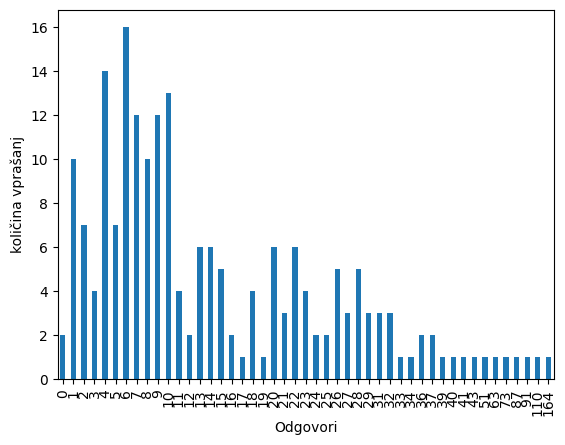

In [11]:
po_odgovorih = VPRASANJA.groupby(by = "Odgovori").size()
po_odgovorih.plot.bar(ylabel = "količina vprašanj")

Mogoče nas zanima kateri dan v tednu je bilo objavljeno kakšno vprašanje. 

In [20]:
from Pomozne_funkcije import prevedi


VPRASANJA["Dan v Tednu"] = VPRASANJA["Datum in ura"].dt.day_name()
VPRASANJA["Dan v Tednu"] = VPRASANJA["Dan v Tednu"].map(prevedi)
VPRASANJA

,Ime,Opomba,Glasovi,Odgovori,Sprejet odgovor,Ogledi,Datum in ura,Dan v Tednu
Id,,,,,,,,
733754,Visually stunning math concepts which are easy...,Odprt,1594,87,Ne,593506,NaT,NaN
21199,Is $\frac{\textrm{d}y}{\textrm{d}x}$ not a ratio?,Odprt,1269,26,Da,136391,2011-02-09 16:23:43,Sreda
379927,How long will it take Marie to saw another boa...,Odprt,1086,32,Da,152079,2013-05-03 03:31:47,Petek
71874,Can I use my powers for good?,Zaprt,920,29,Ne,97452,NaT,NaN
12906,"The staircase paradox, or why $\pi\ne4$",Odprt,877,22,Da,110626,2010-12-03 13:44:56,Petek
...,...,...,...,...,...,...,...,...
4202,Induction on Real Numbers,Odprt,172,7,Da,30557,2010-09-07 11:39:16,Torek
7473,"Prove that $\gcd(a^n - 1, a^m - 1) = a^{\gcd(n...",Odprt,172,10,Ne,48141,2010-10-22 00:47:26,Petek
116026,Is $2048$ the highest power of $2$ with all ev...,Odprt,172,3,Da,17216,2012-03-03 17:35:35,Sobota


Oglejmo si še najbolj zgodno in najbolj pozno vprašanje med prenesenimi.

In [21]:
print(VPRASANJA["Datum in ura"].min())
print(VPRASANJA["Datum in ura"].max())

2010-07-20 19:09:27
2018-07-18 20:32:39


Med njima je minilo veliko časa:

In [19]:
VPRASANJA["Datum in ura"].max() - VPRASANJA["Datum in ura"].min()

Timedelta('2920 days 01:23:12')